<a href="https://colab.research.google.com/github/Siddharthgolecha/QGAN-Probability-Distribution/blob/main/QGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512712 sha256=c81acd95a277b4d16814ff807103c868fbb71a88b77127e1c96da540b1e11639
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3ac

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, BasicAer, QuantumRegister
from qiskit.circuit.library import TwoLocal

from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms.distribution_learners.qgan import *
from qiskit_machine_learning.utils.loss_functions import L2Loss

In [ ]:
# Data Preparation
mu = 1
sigma = 1
N = 2500
data = np.random.lognormal(mu, sigma, size=N)
bounds = np.array([0, 3])
num_qubits = 10

In [ ]:
# Generator Preparation
reps = 3
rotation_blocks = ['ry', 'rx']

gen_circuit = TwoLocal(num_qubits, rotation_blocks, 'cz', entanglement='sca', reps=reps)
init_params = np.random.uniform(low=-np.pi, high=np.pi, size=len(rotation_blocks)*num_qubits*(reps+1))

# Discriminator Preparation

discriminator = NumPyDiscriminator()

In [ ]:
gen_circuit.decompose().draw()

┌──────────┐ ┌──────────┐      ┌───────────┐┌───────────┐             »
q_0: ┤ Ry(θ[0]) ├─┤ Rx(θ[6]) ├─■──■─┤ Ry(θ[12]) ├┤ Rx(θ[18]) ├─────────────»
     ├──────────┤ ├──────────┤ │  │ └───────────┘├───────────┤┌───────────┐»
q_1: ┤ Ry(θ[1]) ├─┤ Rx(θ[7]) ├─┼──■───────■──────┤ Ry(θ[13]) ├┤ Rx(θ[19]) ├»
     ├──────────┤ ├──────────┤ │          │      └───────────┘├───────────┤»
q_2: ┤ Ry(θ[2]) ├─┤ Rx(θ[8]) ├─┼──────────■────────────■──────┤ Ry(θ[14]) ├»
     ├──────────┤ ├──────────┤ │                       │      └───────────┘»
q_3: ┤ Ry(θ[3]) ├─┤ Rx(θ[9]) ├─┼───────────────────────■────────────■──────»
     ├──────────┤┌┴──────────┤ │                                    │      »
q_4: ┤ Ry(θ[4]) ├┤ Rx(θ[10]) ├─┼────────────────────────────────────■──────»
     ├──────────┤├───────────┤ │                                           »
q_5: ┤ Ry(θ[5]) ├┤ Rx(θ[11]) ├─■───────────────────────────────────────────»
     └──────────┘└───────────┘                                             »
«                                                               ┌───────────┐»
«q_0: ───────────────────────────────────────────■───────■──────┤ Ry(θ[24]) ├»
«                                                │       │      └───────────┘»
«q_1: ───────────────────────────────────────────┼───────■────────────■──────»
«     ┌───────────┐                              │                    │      »
«q_2: ┤ Rx(θ[20]) ├──────────────────────────────┼────────────────────■──────»
«     ├───────────┤┌───────────┐                 │                           »
«q_3: ┤ Ry(θ[15]) ├┤ Rx(θ[21]) ├─────────────────┼───────────────────────────»
«     └───────────┘├───────────┤┌───────────┐    │                           »
«q_4: ──────■──────┤ Ry(θ[16]) ├┤ Rx(θ[22]) ├─■──┼───────────────────────────»
«           │      ├───────────┤├───────────┤ │  │ ┌───────────┐┌───────────┐»
«q_5: ──────■──────┤ Ry(θ[17]) ├┤ Rx(θ[23]) ├─■──■─┤ Ry(θ[29]) ├┤ Rx(θ[35]) ├»
«                  └───────────┘└───────────┘      └───────────┘└───────────┘»
«     ┌───────────┐                                                          »
«q_0: ┤ Rx(θ[30]) ├──────────────────────────────────────────────────────────»
«     ├───────────┤┌───────────┐                                             »
«q_1: ┤ Ry(θ[25]) ├┤ Rx(θ[31]) ├─────────────────────────────────────────────»
«     └───────────┘├───────────┤┌───────────┐                                »
«q_2: ──────■──────┤ Ry(θ[26]) ├┤ Rx(θ[32]) ├────────────────────────────────»
«           │      └───────────┘├───────────┤┌───────────┐                   »
«q_3: ──────■────────────■──────┤ Ry(θ[27]) ├┤ Rx(θ[33]) ├─■─────────────────»
«                        │      ├───────────┤├───────────┤ │    ┌───────────┐»
«q_4: ───────────────────■──────┤ Ry(θ[28]) ├┤ Rx(θ[34]) ├─■──■─┤ Ry(θ[40]) ├»
«                               └───────────┘└───────────┘    │ └───────────┘»
«q_5: ────────────────────────────────────────────────────────■──────────────»
«                                                                            »
«                     ┌───────────┐┌───────────┐                          
«q_0: ─■───────■──────┤ Ry(θ[36]) ├┤ Rx(θ[42]) ├──────────────────────────
«      │       │      └───────────┘├───────────┤┌───────────┐             
«q_1: ─┼───────■────────────■──────┤ Ry(θ[37]) ├┤ Rx(θ[43]) ├─────────────
«      │                    │      └───────────┘├───────────┤┌───────────┐
«q_2: ─┼────────────────────■────────────■──────┤ Ry(θ[38]) ├┤ Rx(θ[44]) ├
«      │                                 │      ├───────────┤├───────────┤
«q_3: ─┼─────────────────────────────────■──────┤ Ry(θ[39]) ├┤ Rx(θ[45]) ├
«      │ ┌───────────┐                          └───────────┘└───────────┘
«q_4: ─┼─┤ Rx(θ[46]) ├────────────────────────────────────────────────────
«      │ ├───────────┤┌───────────┐                                       
«q_5: ─■─┤ Ry(θ[41]) ├┤ Rx(θ[47]) ├───────────────────────────────────────
«        └───────────┘└───────────┘

In [ ]:
# Preparing QGAN
batch_size = 250
epochs = 3
backend = BasicAer.get_backend('qasm_simulator')
qgan = QGAN(data, bounds, [num_qubits], batch_size, epochs,
            discriminator=discriminator, quantum_instance= backend)
qgan.set_generator(generator_circuit=gen_circuit, generator_init_params=init_params)

In [ ]:
result = qgan.run() # Running/Training QGAN

In [ ]:
print('Training results:')
for key, value in result.items():
    print(f'  {key} : {value}')

Training results:
  params_d : [-0.51566365  0.41737141  0.68452634 ... -0.19354686  0.12770654
 -0.00916394]
  params_g : [ 0.37511808 -0.14916588 -2.8365062  -2.82992818 -0.89368375  1.55182945
  0.99402157  1.13222707  1.39577939  0.19475938  3.05171261 -2.33352303
  1.55999137 -1.2904189  -2.94177184 -0.59171123  1.47696302 -1.05676243
  0.8184404  -2.68588891  3.1402882  -2.56956469  1.74602827  2.82419825
 -2.07131292  2.02916815 -0.37631269  0.53220825 -2.15250123 -2.94886518
 -1.9405111   1.778531   -0.04378846  1.59969889  2.38401384  2.6306552
 -1.49822122 -3.12066852 -0.05953858 -1.71602558 -3.13042863  2.72316137
 -1.29895195 -1.66977602  2.22590119  0.93360486 -1.08296967  1.47060675
  1.84836565 -1.20130804 -0.96388829  1.98255082  1.87919952  1.96516967
  2.68326265  0.18878814 -2.34767175  3.01385623 -2.35580916 -2.53643786
 -0.18489942  0.03792534 -0.05113823  1.23437223 -0.20253657 -0.2829645
  0.24651273  1.72935717  1.74050884 -1.81437811  2.57788566  0.85104778
 -0

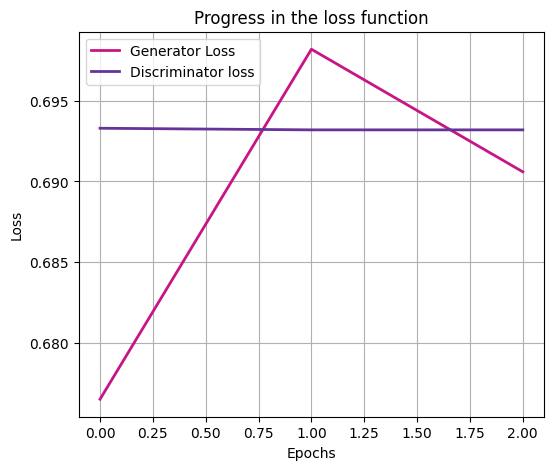

In [ ]:
t_steps = np.arange(epochs)
plt.figure(figsize=(6,5))
plt.title("Progress in the loss function")
plt.plot(t_steps, qgan.g_loss, label='Generator Loss', color='mediumvioletred', linewidth=2)
plt.plot(t_steps, qgan.d_loss, label='Discriminator loss', color='rebeccapurple', linewidth=2)
plt.grid()
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

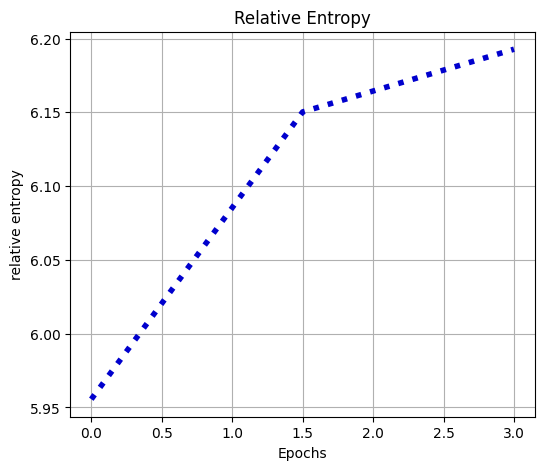

In [ ]:
# Plot progress w.r.t relative entropy
plt.figure(figsize=(6,5))
plt.title('Relative Entropy')
plt.plot(np.linspace(0, epochs, len(qgan.rel_entr)), qgan.rel_entr, color='mediumblue', lw=4, ls=':')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('relative entropy')
plt.show()

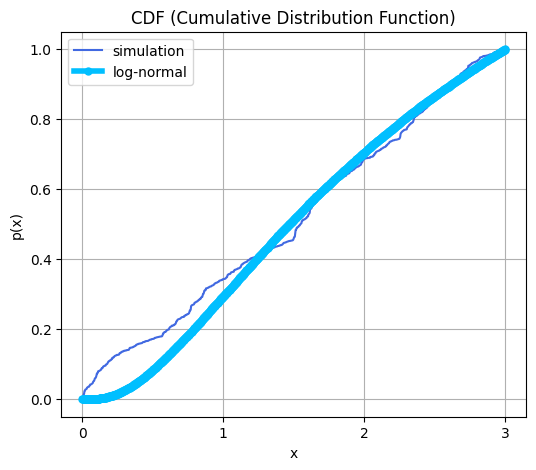

In [ ]:
log_normal = np.random.lognormal(mean=mu, sigma=sigma, size=100000)
log_normal = log_normal[log_normal <= bounds[1]]
temp = []
distribution = np.linspace(bounds[0], bounds[1], 2**num_qubits+1)
for i in range(len(distribution)-1):
    temp += [np.sum((log_normal>=distribution[i]) & (log_normal<distribution[i+1]))]
log_normal = np.array(temp / sum(temp))

plt.figure(figsize=(6,5))
plt.title('CDF (Cumulative Distribution Function)')
samples_g, prob_g = qgan.generator.get_output(qgan.quantum_instance, shots=10000)
samples_g = np.array(samples_g)
samples_g = samples_g.flatten()
num_bins = len(prob_g)
plt.plot(samples_g,  np.cumsum(prob_g), color='royalblue', label='simulation')
plt.plot(np.linspace(bounds[0], bounds[1], 2**num_qubits), np.cumsum(log_normal),'-o', label='log-normal', color='deepskyblue', linewidth=4, markersize=5)
plt.xticks(np.arange(min(samples_g), max(samples_g)+1, 1.0))
plt.grid()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(loc='best')
plt.show()